# 1. Step 1 Loading Libraries and Dataset from MNIST database for Handwritten Digits Image Processing Machine Learning.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Activation
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

Here we import the different libraries, including numpy, matplotlib,  collections, sklearn, itertools and keras. Numpy is used here for making numpy arrays. Matplotlib is a plotting library that we are going to use it for confusion matrix plot. Keras is a high-level neural network API which will run on top of TensorFlow. We will be using its dataset mnist, to_categorical function, sequential model, dense & activation core layers and optimizers.

# 2. Step 2 Loading Data into variables and normalizing the input values.

In [2]:
# Loads the mnist dataset (Details in report)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize tensors by scaling input values to type float32 that have values 0 or 1
x_train = X_train.astype("float32")
x_test = X_test.astype("float32")
x_train /= 255
x_test /= 255

11490434/11490434 [==============================] - 0s 0us/step


Here, we are loading the MNIST dataset. The training and test sets are assigned to X_train, y_train, X_test, and y_test respectively. These variables contain images of handwritten digits and the corresponding labels indicating which digit each image represents. The images are stored as Numpy arrays, and the pixel values are in the range [0, 255]. 

Then it converts the data type of the images to "float32" and divides each image by 255 to normalize the pixel values. We do  scaling to make the model work with small numbers and helps improve its performance. After normalization, the pixel values will be in the range [0, 1].

# 3. Step 3 Reshaping the vector arrays and setting up categorical representation

In [3]:
# Need vector array of 784 numbers for Neural Network input
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)

# Sets up categorical representation of the digit class where the indexes are the class values and an element 1 indicates that it was classified as that index value
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

We modify the shape of the training and test images using the reshape() method. The images in the MNIST dataset are 28x28, but the Dense layers in the model expect a 1D input of 784 (28x28) features, so we use reshape() method to convert the 28x28 images into a 1D array of 784 values.

The to_categorical() method is then used to convert the class labels from a 1D array of integer values to a 2D array of binary values. This representation is useful when training a model with categorical cross-entropy loss, as it allows the model to learn a probability distribution over the classes.

# 4. Step 4 Initializing Artificial Neural Network (ANN)

In [4]:
# Initialize the ANN with an initial layer and a hidden layer. Dense means fully connected
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,))) # Input as a tensor that has 784 features
model.add(Dense(10, activation='softmax')) # 10 neurons that will result in a matrix of 10 probabilities for the digit classes

We use the Sequential model and two Dense layers. The first Dense layer has 10 units and uses the sigmoid activation function. This layer will receive the 784-dimensional input from the MNIST dataset and will reduce it to a 10-dimensional representation. The second Dense layer also has 10 units, but uses the softmax activation function which will output a 10-dimensional vector representing the probabilities of each class.

The Sequential model allows you to create a linear stack of layers, where the output of one layer is fed as input to the next layer. This is a simple and common architecture for feed-forward neural networks. The Dense layers are fully-connected layers, where each unit in the layer is connected to all units in the previous and next layers.



# 5. Step 5 Generating summary of model

In [5]:
# Display summary of model
model.summary()

# Initialize ANN with hyper parameters
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Here, the summary() method of the Sequential model prints a summary of the model's architecture. This includes the layer type, output shape, and number of parameters for each layer.

The compile() method is used to configure the model for training. It takes several arguments, including the loss function (categorical cross-entropy loss) , the optimizer (stochastic gradient descent (SGD)) , and metrics (accuracy) to evaluate during training and testing.

# 6. Step 6 Training the modal and Testing 

In [ ]:
# If you would like to load the pre-trained model, which will be the output you see below, trained 6679 epochs with batch size 100.

# Here if you are using Google Collab then go to Step 8 for connecting the Google drive to Collab Notebook.
# But if you are using Jupyter Notebook on local machine please follows instructions from Step 9.

# Please load the model by editing the 'path' variable from Step 9 and loading the model in Step 10 and 
# then continue running the code from step 6 but Please SKIP THIS PART OF CODE in Step 6.

# Train ANN using set batch size and epochs
model.fit(x_train, y_train, batch_size=100, epochs=6700)

Streaming output truncated to the last 5000 lines.
Epoch 4163/10000
600/600 [==============================] - 2s 3ms/step - loss: 0.2226 - accuracy: 0.9354
Epoch 4164/10000
600/600 [==============================] - 2s 3ms/step - loss: 0.2195 - accuracy: 0.9362
Epoch 4165/10000
600/600 [==============================] - 2s 3ms/step - loss: 0.2198 - accuracy: 0.9365
Epoch 4166/10000
600/600 [==============================] - 2s 3ms/step - loss: 0.2160 - accuracy: 0.9376
Epoch 4167/10000
600/600 [==============================] - 2s 3ms/step - loss: 0.2188 - accuracy: 0.9372
Epoch 4168/10000
600/600 [==============================] - 2s 3ms/step - loss: 0.2189 - accuracy: 0.9369
Epoch 4169/10000
600/600 [==============================] - 2s 3ms/step - loss: 0.2174 - accuracy: 0.9370
Epoch 4170/10000
600/600 [==============================] - 2s 3ms/step - loss: 0.2141 - accuracy: 0.9382
Epoch 4171/10000
600/600 [==============================] - 2s 3ms/step - loss: 0.2123 - accuracy: 0.

KeyboardInterrupt: ignored

In [9]:
# Predict classes for test data
testLoss, testAcc = model.evaluate(x_test, y_test)

# Product digit probabilities
digitProbabilities = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


Once the model is compiled, we train it using the fit() method, includes the training data, the number of epochs (10,000 ), and the batch size (100). An epoch is a single pass through the entire training set, and the batch size is the number of samples to use in each iteration of training.

After training, the evaluate() method is used to evaluate the model on the test data. This method returns the loss and accuracy of the model on the test set.

The predict() method is used to generate predictions for the test data. This method returns a matrix of probabilities for each image, where each row corresponds to an image and each column corresponds to a class. The predicted class for each image is the class with the highest probability.

# 7. Step 7 Testing model through user input

Enter image ID (1, 10,000) to see that image (-1 to exit): 654


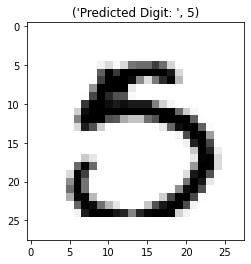

Enter image ID (1, 10,000) to see that image (-1 to exit): 23


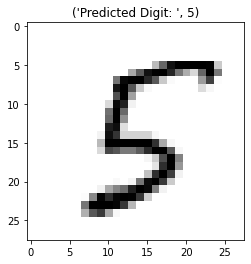

Enter image ID (1, 10,000) to see that image (-1 to exit): 4


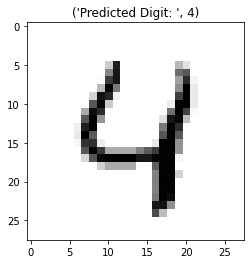

Enter image ID (1, 10,000) to see that image (-1 to exit): 456


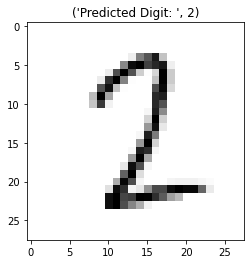

Enter image ID (1, 10,000) to see that image (-1 to exit): 99


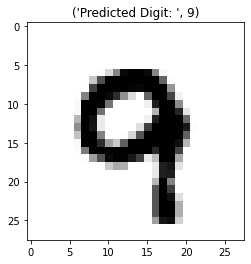

Enter image ID (1, 10,000) to see that image (-1 to exit): 9999


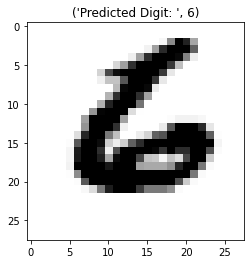

Enter image ID (1, 10,000) to see that image (-1 to exit): -1
Test Accuracy 0.9096


In [ ]:
# Prompt user to enter ID to view image and resulting predicted class
Input = int(input("Enter image ID (1, 10,000) to see that image (-1 to exit): "))
while Input != -1:
    predicitedDigit = np.argmax(digitProbabilities[Input])

    title = "Predicted Digit: ", predicitedDigit
    plt.title(title)
    plt.imshow(X_test[Input], cmap=plt.cm.binary)
    plt.show()
    Input = int(input("Enter image ID (1, 10,000) to see that image (-1 to exit): "))

# Print metrics
print("Test Accuracy", round(testAcc, 4))


Here we view individual images from the test set and see the model's predicted digit for that image. The code uses the argmax() function from Numpy to find the index of the maximum element in the predicted probabilities for each image. This index corresponds to the predicted class for the image. The image and its predicted digit are then displayed using matplotlib.

The code also prints the test accuracy of the model at the end, which is the overall accuracy of the model on the test set, calculated as the number of correct predictions divided by the total number of images.

# 8. Step 8 Loading Google Drive 

In [6]:
# We mount Google Drive on a Google Colaboratory notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 9. Step 9 Saving the trained model to G-Drive

In [7]:
path = '/content/drive/MyDrive/digits' + '/' ; # Path for Google Collab

# path = 'C:/Users/Yash Rojiwadia/Downloads/digits' ; # Path for Local Machine 

# If you want to load path Please RUN THIS CELL ONLY.

In [ ]:
# SKIP this code part if you haven't loaded the model yet.

# We saves the trained model to a file on Google Drive. 
model.save(path + 'model')

# 10. Step 10 Loading the trained model from G-Drive

In [8]:
from keras.models import load_model
# Load the saved model from the path

model = load_model(path + 'model')

# 11. Step 11 Defining Confusion Matrix Method

In [10]:
# Plot confusion matrix 
# Note: confusion-matrix function is taken from the SKLEARN website: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plotConfusionMatrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')
    plt.show()

We made a function for plotting a confusion matrix. A confusion matrix is a table that is used to evaluate the performance of a classification model. It shows the number of correct and incorrect predictions made by the model for each class.

The function first creates a matplotlib figure and uses the imshow() method to plot the confusion matrix using the specified color map.

The function uses the tight_layout() method to adjust the layout of the plot, and uses the show() method to display the plot.

# 12. Step 12 Plotting Confusion Matrix for Performance check

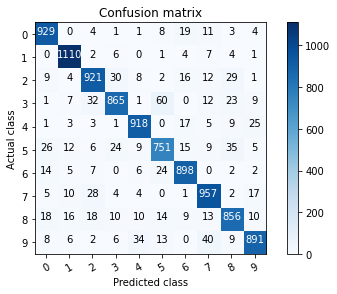

In [11]:
digitClasses = np.argmax(digitProbabilities, axis=1)
output = np.argmax(y_test, axis=1)

confusionMtx = confusion_matrix(output, digitClasses)
plotConfusionMatrix(confusionMtx, classes = range(10))

Here we plot the confusion matrix for the model's predictions on the test set and uses the plotConfusionMatrix() function to plot it.

The argmax() function from Numpy is used to find the predicted class for each image in the test set. The axis argument is set to 1 to apply the argmax() function along the columns of the matrix, which will find the index of the maximum element in each row. This index corresponds to the predicted class for each image.

The confusion_matrix() function from sklearn.metrics is used to generate the confusion matrix. This function takes the true labels and the predicted labels as arguments, and returns a matrix where the rows and columns correspond to the actual and predicted classes, respectively. The entries in the matrix indicate the number of samples that were predicted as the corresponding class.

Finally, the plotConfusionMatrix() function is used to plot the confusion matrixusing the confusion matrix and a list of the class names as arguments. The resulting plot shows the number of correct and incorrect predictions made by the model for each class. we can evaluate the performance of the model and identify any classes that the model is having difficulty with.